In [6]:
from shutil import unpack_archive
import requests
import pandas as pd
import io
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib notebook
plt.rcParams['figure.figsize'] = [9.5, 9.5]

In [2]:
def get_data():
    DATA_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
    r = requests.get(DATA_URL, allow_redirects=True)
    r.raise_for_status()
    s = r.content
    c = pd.read_csv(io.StringIO(s.decode('utf-8')))
    return c

data = get_data()

In [3]:
days = [(c, datetime.strptime(c, '%m/%d/%y')) for c in data.columns if c not in ('Lat', 'Long', 'Province/State', 'Country/Region')]
days = sorted(days, key=lambda c: c[1])
#usdata = data[data['Country/Region'] == 'US']
#print(days)

In [4]:
states = ['Washington', 'Texas', 'California', 'Georgia', 'Nevada']
#plt.figure()

df = {'date': [tup[1] for tup in days]}
ys = []
for state in states:
    row = (data[data['Province/State'] == state])
    assert(len(row) == 1)
    daystrings = [tup[0] for tup in days]
    ts = [row[day].tolist()[0] for day in daystrings]
    df[state] = ts
#ts = [row[(0, tup[0])] for tup in days]
#row   
df = pd.DataFrame(df)

<IPython.core.display.Javascript object>


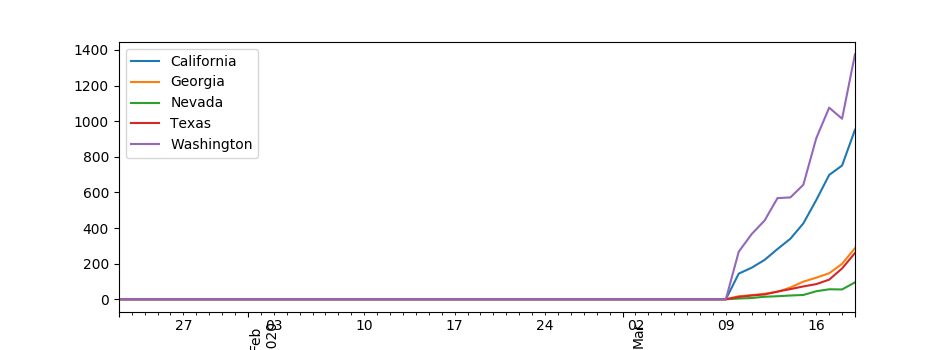

(array([18283, 18293, 18322, 18340]), <a list of 4 Text xticklabel objects>)

In [23]:
plt.rcParams['figure.figsize'] = [9.5, 3.5]
lines = df.plot(x='date')
plt.xticks(rotation='vertical')

#plt.xlim([days[48], days[-1]])

In [17]:
df

,California,Georgia,Nevada,Texas,Washington,date
0,0,0,0,0,0,2020-01-22
1,0,0,0,0,0,2020-01-23
2,0,0,0,0,0,2020-01-24
3,0,0,0,0,0,2020-01-25
4,0,0,0,0,0,2020-01-26
5,0,0,0,0,0,2020-01-27
6,0,0,0,0,0,2020-01-28
7,0,0,0,0,0,2020-01-29
8,0,0,0,0,0,2020-01-30
9,0,0,0,0,0,2020-01-31
